<a href="https://colab.research.google.com/github/mark-morelos/DS-Unit-2-Applied-Modeling/blob/master/Copy_of_LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [ ]:
import pandas as pd
import numpy as np

shelter_outcome = pd.read_csv('sample_data/Animal_Shelter_Intake_and_Outcome.csv')
shelter_outcome.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,SKY,DOG,GERM SHEPHERD,BLACK/TAN,Female,MED,NaN,K20-035118,DS69,A395686,1/19/20,1/23/20,4,STRAY,FIELD,RETURN TO OWNER,OVER THE COUNTER_CALL,HEALTHY,HEALTHY,COUNTY,COUNTY,95404.0,"95404(38.458384, -122.675588)",1
1,COCO,DOG,BEAGLE,TRICOLOR,Neutered,SMALL,4/6/15,K17-025093,DS83,A379968,8/30/17,10/4/17,35,STRAY,FIELD,TRANSFER,NC AN FRND,UNKNOWN,HEALTHY,SANTA ROSA,OUT OF COUNTY,95758.0,"95758(38.424655, -121.438065)",1
2,BRATT,CAT,DOMESTIC SH,BRN TABBY,Spayed,SMALL,9/1/10,K18-028633,MAC,A374010,6/13/18,8/11/18,59,OWNER SURRENDER,OVER THE COUNTER,ADOPTION,MOB EVENT,TREATABLE/MANAGEABLE,HEALTHY,COUNTY,SANTA ROSA,95405.0,"95405(38.439152, -122.672541)",1
3,DOONA,DOG,PIT BULL,TAN/WHITE,Male,LARGE,7/6/16,K20-035573,DS67,A389249,3/11/20,3/13/20,2,STRAY,FIELD,RETURN TO OWNER,OVER THE COUNTER_NOTICE,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95409.0,"95409(38.458965, -122.630156)",0
4,SUZIE,DOG,LABRADOR RETR/MIX,BLACK,Spayed,LARGE,1/23/11,K15-012348,DA34,A315553,1/7/15,1/24/15,17,STRAY,OVER THE COUNTER,ADOPTION,INTERNET,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"95404(38.458384, -122.675588)",1


In [ ]:
# replace spaces in column names with underscore
shelter_outcome.columns = shelter_outcome.columns.str.replace(' ','_')
shelter_outcome.head(3)

,Name,Type,Breed,Color,Sex,Size,Date_Of_Birth,Impound_Number,Kennel_Number,Animal_ID,Intake_Date,Outcome_Date,Days_in_Shelter,Intake_Type,Intake_Subtype,Outcome_Type,Outcome_Subtype,Intake_Condition,Outcome_Condition,Intake_Jurisdiction,Outcome_Jurisdiction,Outcome_Zip_Code,Location,Count
0,SKY,DOG,GERM SHEPHERD,BLACK/TAN,Female,MED,NaN,K20-035118,DS69,A395686,1/19/20,1/23/20,4,STRAY,FIELD,RETURN TO OWNER,OVER THE COUNTER_CALL,HEALTHY,HEALTHY,COUNTY,COUNTY,95404.0,"95404(38.458384, -122.675588)",1
1,COCO,DOG,BEAGLE,TRICOLOR,Neutered,SMALL,4/6/15,K17-025093,DS83,A379968,8/30/17,10/4/17,35,STRAY,FIELD,TRANSFER,NC AN FRND,UNKNOWN,HEALTHY,SANTA ROSA,OUT OF COUNTY,95758.0,"95758(38.424655, -121.438065)",1
2,BRATT,CAT,DOMESTIC SH,BRN TABBY,Spayed,SMALL,9/1/10,K18-028633,MAC,A374010,6/13/18,8/11/18,59,OWNER SURRENDER,OVER THE COUNTER,ADOPTION,MOB EVENT,TREATABLE/MANAGEABLE,HEALTHY,COUNTY,SANTA ROSA,95405.0,"95405(38.439152, -122.672541)",1


**TASK 1**: Choose your target. Which column in your tabular dataset will you predict? --- Outcome Type, if Adoption or Not. Created a boolean column based on the Outcome_Type column.

In [ ]:
# column to be used for predictive model
shelter_outcome['Outcome_Type'].describe()
shelter_outcome['Outcome_Type'].value_counts(normalize=True)

RETURN TO OWNER    0.337053
ADOPTION           0.320748
TRANSFER           0.187506
EUTHANIZE          0.140324
DIED               0.006828
DISPOSAL           0.006267
ESCAPED/STOLEN     0.000866
RTOS               0.000408
Name: Outcome_Type, dtype: float64

In [ ]:
# check for null values
shelter_outcome['Outcome_Type'].isnull().sum()

114

In [ ]:
shelter_outcome = shelter_outcome.dropna(subset=['Outcome_Type'])
shelter_outcome['Outcome_Type'].isnull().sum()

0

**TASK 2**: Is your problem regression or classification? --- **CLASSIFICATION**

In [ ]:
# add a boolean column for True if ADOPTION and False if not for 'Outcome_Type'
shelter_outcome['Adopted'] = shelter_outcome['Outcome_Type'] == 'ADOPTION'
shelter_outcome['Adopted'].head(5)

0    False
1    False
2     True
3    False
4     True
Name: Adopted, dtype: bool

**TASK 3:** How is your target distributed?
Classification: How many classes? Are the classes imbalanced? --- 2 classes

In [ ]:
# target distribution
y = shelter_outcome['Adopted']
y.value_counts(normalize=True)

False    0.679252
True     0.320748
Name: Adopted, dtype: float64

In [ ]:
# data exploration on Intake Type
shelter_outcome['Intake_Type'].unique()

array(['STRAY', 'OWNER SURRENDER', 'CONFISCATE', 'QUARANTINE', 'TRANSFER',
       'ADOPTION RETURN'], dtype=object)

In [ ]:
# high cardinality features
shelter_outcome = shelter_outcome.drop(columns=['Name', 'Impound_Number', 'Kennel_Number',
                                                'Animal_ID'])

In [ ]:
# find missing values
shelter_outcome.isna().sum().sort_values()

Type                       0
Intake_Jurisdiction        0
Intake_Condition           0
Outcome_Type               0
Count                      0
Intake_Type                0
Days_in_Shelter            0
Intake_Subtype             0
Intake_Date                0
Sex                        0
Color                      0
Breed                      0
Outcome_Date               0
Adopted                    0
Size                      31
Outcome_Subtype          168
Outcome_Condition        196
Outcome_Jurisdiction    2684
Outcome_Zip_Code        2712
Location                2712
Date_Of_Birth           4725
dtype: int64

In [ ]:
shelter_outcome = shelter_outcome.fillna('No Data')

In [ ]:
# time-based split using 'Intake_Date'
# convert to datetime

shelter_outcome['Intake_Date'] = pd.to_datetime(shelter_outcome['Intake_Date'])
shelter_outcome['Intake_Date'].describe()

count                   19626
unique                   2312
top       2018-04-24 00:00:00
freq                       47
first     2013-08-16 00:00:00
last      2020-07-28 00:00:00
Name: Intake_Date, dtype: object

In [ ]:
# create 'Intake_Year' column
shelter_outcome['Intake_Year'] = shelter_outcome['Intake_Date'].dt.year 
shelter_outcome['Intake_Year'].tail(3)

19737    2018
19738    2017
19739    2014
Name: Intake_Year, dtype: int64

In [ ]:
# split to training: 2013-2015, val: 2016-2018, test: 2019-2020
train = shelter_outcome[shelter_outcome['Intake_Year'] <= 2015]
val = shelter_outcome[(shelter_outcome['Intake_Year'] >= 2016) & (shelter_outcome['Intake_Year'] >= 2018)]
test = shelter_outcome[shelter_outcome['Intake_Year'] >=2019]

# shape of dataframes
train.shape, val.shape, test.shape

((6533, 22), (6706, 22), (3629, 22))

In [ ]:
train.head()

,Type,Breed,Color,Sex,Size,Date_Of_Birth,Intake_Date,Outcome_Date,Days_in_Shelter,Intake_Type,Intake_Subtype,Outcome_Type,Outcome_Subtype,Intake_Condition,Outcome_Condition,Intake_Jurisdiction,Outcome_Jurisdiction,Outcome_Zip_Code,Location,Count,Adopted,Intake_Year
4,DOG,LABRADOR RETR/MIX,BLACK,Spayed,LARGE,1/23/11,2015-01-07,1/24/15,17,STRAY,OVER THE COUNTER,ADOPTION,INTERNET,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95404,"95404(38.458384, -122.675588)",1,True,2015
37,DOG,LABRADOR RETR/MIX,BLACK/WHITE,Neutered,LARGE,10/1/02,2014-12-30,12/30/14,0,STRAY,FIELD,RETURN TO OWNER,OVER THE COUNTER_NOTICE,TREATABLE/MANAGEABLE,HEALTHY,SANTA ROSA,SANTA ROSA,95404,"95404(38.458384, -122.675588)",1,False,2014
64,DOG,LABRADOR RETR/MIX,BLACK,Neutered,MED,4/2/99,2014-04-02,4/2/14,0,STRAY,FIELD,RETURN TO OWNER,RETURN TO OWNER,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95436,"95436(38.491884, -122.90672)",1,False,2014
82,CAT,SIAMESE,LYNX PT,Neutered,KITTN,8/27/14,2014-10-14,11/14/14,31,STRAY,OVER THE COUNTER,ADOPTION,INTERNET,TREATABLE/REHAB,HEALTHY,SANTA ROSA,COUNTY,95492,"95492(38.541541, -122.809202)",1,True,2014
93,DOG,PIT BULL,BROWN/WHITE,Neutered,LARGE,6/10/14,2015-11-25,10/5/16,315,STRAY,OVER THE COUNTER,ADOPTION,REFERRAL,TREATABLE/MANAGEABLE,TREATABLE/MANAGEABLE,SANTA ROSA,SANTA ROSA,95404,"95404(38.458384, -122.675588)",1,True,2015


In [44]:
%pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 2.2MB/s 


**TASK 4**: Choose your evaluation metric(s).
Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want.

In [48]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

# target
target = 'Adopted'

# set features
features = train.columns.drop([target, 'Intake_Date', 'Intake_Year', 'Outcome_Type'])

# define X_train, y_train, X_val, and y_val
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

# define pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=3)
)

# run pipeline on training
pipeline.fit(X_train, y_train)

# print validation accuracy
print('Accuracy', pipeline.score(X_val, y_val))

Accuracy 0.904264837458992


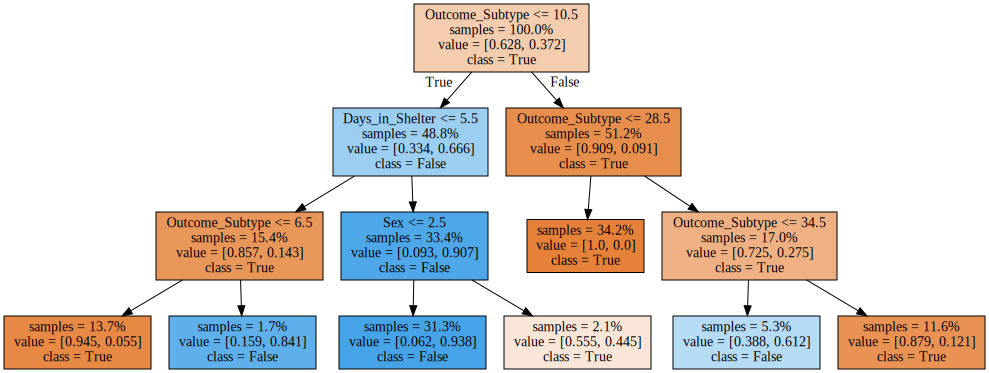

In [50]:
# visualize decision tree
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=y_train.unique().astype(str),
    filled=True,
    impurity=False,
    proportion=True
)

graphviz.Source(dot_data)

In [51]:
# distribution of classes
y.value_counts(normalize=True)

False    0.679252
True     0.320748
Name: Adopted, dtype: float64

In [53]:
# calculate ROC AUC with sklearn
from sklearn.metrics import roc_auc_score

# predicted probabilities
y_pred_proba = pipeline.predict_proba(X_val)[:, -1]

# calculate AUC
auc = roc_auc_score(y_val, y_pred_proba)

auc

0.9425365753168826

In [54]:
# calculate True Positive Rate (TPR) & False Positive Rate (FPR) at various thresholds
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# table results
pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr,
    'Threshold': thresholds
})

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.938416
1,0.066774,0.812100,0.938416
2,0.071185,0.842350,0.840708
3,0.098456,0.912158,0.612069
4,0.165831,0.959860,0.445255
5,0.308201,0.962769,0.120894
6,0.516342,1.000000,0.054871
7,1.000000,1.000000,0.000000


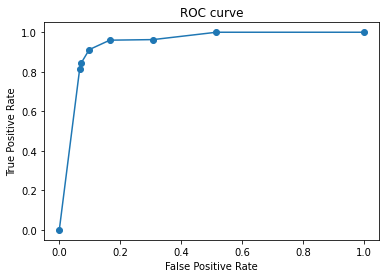

In [55]:
# plot results (ROC Curve)
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');